# Candidate Test 2022 Analysis Part 1

This exercise focuses on the candidate tests from two television networks: DR and TV2. Data from both tests have been given on a scale of five responses (-2, -1, 0, 1, 2).

---

There are 6 datasets included in this exercise:

- `alldata.xlsx`: Contains responses from both TV stations.
- `drdata.xlsx`: Contains responses from DR.
- `drq.xlsx`: Contains questions from DR.
- `tv2data.xlsx`: Contains responses from TV2.
- `tv2q.xlsx`: Contains questions from TV2.
- `electeddata.xlsx`: Contains responses from both TV stations for candidates who were elected to the parliament. Note that 9 members are missing; 7 of them didn't take any of the tests. Additionally, some notable figures like Mette F. and Lars Løkke did not participate in any of the tests.

---

It's entirely up to you how you approach this data, but at a *minimum*, your analysis should include:
- Age of the candidates grouped by parties.
- An overview of the most "confident" candidates, i.e., those with the highest proportion of "strongly agree" or "strongly disagree" responses.
- Differences in responses between candidates, both inter-party and intra-party, along with an explanation of which parties have the most internal disagreements.
- Classification models to predict candidates' party affiliations. Investigate if there are any candidates who seem to be in the "wrong" party based on their political landscape positions. You must use the following three algorithms: **Decision Tree, Random Forrest, and Gradient Boosted Tree**, and **two other** classification algorithms of your choice.

---

The following parties are represented:

| Party letter | Party name | Party name (English) | Political position |
| :-: | :-: | :-: | :-: |
| A | Socialdemokratiet | Social Democrats | Centre-left |
| V | Venstre | Danish Liberal Party | Centre-right |
| M | Moderaterne | Moderates | Centre-right |
| F | Socialistisk Folkeparti | Socialist People's Party | Left-wing |
| D | Danmarksdemokraterne | Denmark Democrats | Right-wing |
| I | Liberal Alliance | Liberal Alliance | Right-wing |
| C | Konservative | Conservative People's Party | Right-wing |
| Æ | Enhedslisten | Red-Green Alliance | Far-left |
| B | Radikale Venstre | Social Liberal Party | Centre-left |
| D | Nye Borgerlige | New Right | Far-right |
| Z | Alternativet | The Alternative | Centre-left |
| O | Dansk Folkeparti | Danish People's Party | Far-right |
| G | Frie Grønne | Free Greens | Centre-left |
| K | Kristendemokraterne | Christian Democrats | Centre-right |

Below you can see the results and the colors chosen to represent the parties. Use these colors in your analysis above.

![Alt text](image-1.png)


Others have undertaken similar analyses. You can draw inspiration from the following (use Google tranlsate if your Danish is rusty):

- [Analysis of where individual candidates stand relative to each other and their parties](https://v2022.dumdata.dk/)
- [Candidate Test 2022 – A deep dive into the data](https://kwedel.github.io/kandidattest2022/)
- [The Political Landscape 2019](https://kwedel.github.io/kandidattest2019/)



### Question 1: Age of the candidates grouped by parties

count    851.000000
mean      44.701528
std       13.188684
min       18.000000
25%       35.000000
50%       46.000000
75%       55.000000
max       79.000000
Name: alder, dtype: float64

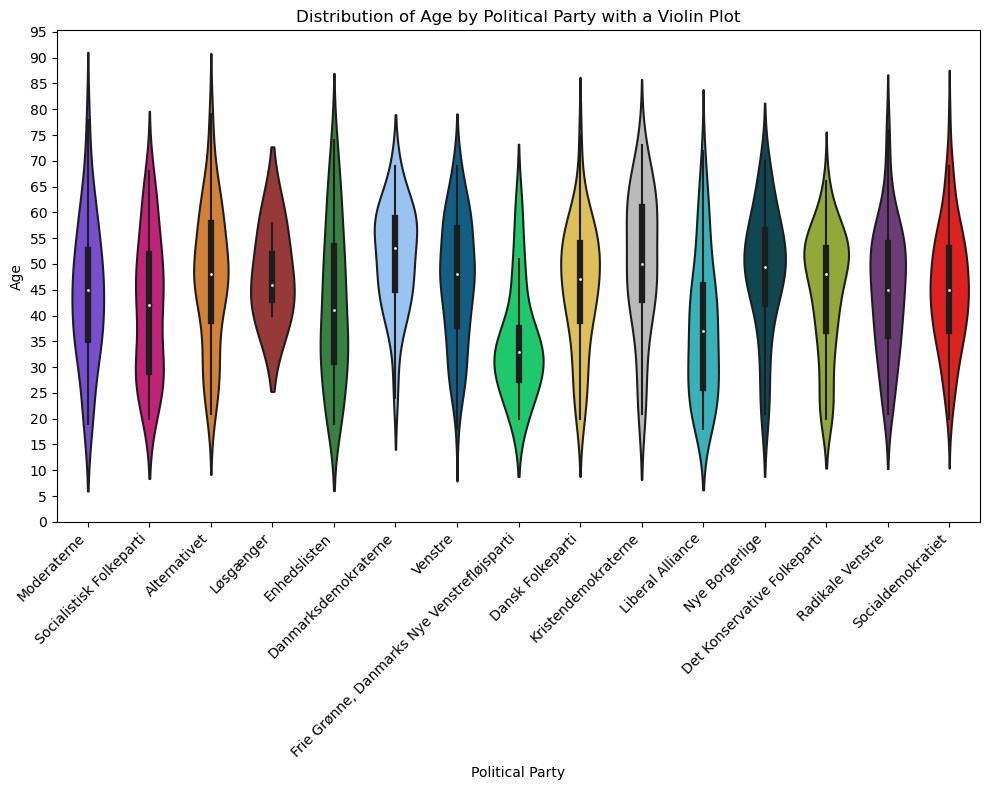

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load Excel data into a pandas DataFrame
data = 'alldata.xlsx'
df = pd.read_excel(data)
df.head()

# Filter out rows where Age is not equal to 0
df = df[df['alder'] != 0]

# Define custom color palette
party_colors_palette = {
    "Socialdemokratiet": "red",
    "Radikale Venstre": "#713280",
    "Det Konservative Folkeparti": "#9EBA27",
    "Nye Borgerlige": "#054F5C",
    "Socialistisk Folkeparti": "#DD0878",
    "Liberal Alliance": "#21C6CF",
    "Kristendemokraterne": "#BABABA",
    "Moderaterne": "#6C39E5",
    "Dansk Folkeparti": "#F3CD41",
    "Frie Grønne, Danmarks Nye Venstrefløjsparti": "#00E66A",
    "Enhedslisten": "#2A8F39",
    "Venstre": "#006697",
    "Danmarksdemokraterne": "#8AC3FF",
    "Alternativet": "#ED8019",
    "Løsgænger": "brown"
}

#Checking descriptive statistics
display(df['alder'].describe())

# Create a violin plot
plt.figure(figsize=(10, 8))
sns.violinplot(data=df, x='parti', y='alder', palette=party_colors_palette)
plt.title('Distribution of Age by Political Party with a Violin Plot')
plt.xlabel('Political Party')
plt.ylabel('Age')
plt.yticks(np.arange(0, 100, 5))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



### Question 2: Overview of the most confident candidates - strongly agree OR strongly disagree

In [20]:

#Lets drop the irrelevant columns for our analysis
columns = df.drop(['alder', 'navn', 'parti', 'storkreds'], axis=1)

# Count the occurrences of strongly agree (score 2) and strongly disagree (score -2) values for each candidate
candidates = ((columns == 2) | (columns == -2)).sum(axis=1).sort_values(ascending=False)

df.loc[candidates.head().index, ['navn', 'parti', 'storkreds']]\
    .assign(score=candidates.head())

#It results in top 5 confident candidates, where Soren and Sarah share the same score. 

,navn,parti,storkreds,score
88,Søren Vanting,Det Konservative Folkeparti,Østjyllands Storkreds,49
505,Sarah Nørris,Enhedslisten,Sydjyllands Storkreds,49
559,Kim Andkjær Doberck,Nye Borgerlige,Sydjyllands Storkreds,44
152,Rashid Ali,"Frie Grønne, Danmarks Nye Venstrefløjsparti",Københavns Storkreds,43
44,Mohamed Abdikarim,"Frie Grønne, Danmarks Nye Venstrefløjsparti",Østjyllands Storkreds,43


### Question 3: Intra-party and Inter-party differences

### Intra-party difference between candidates

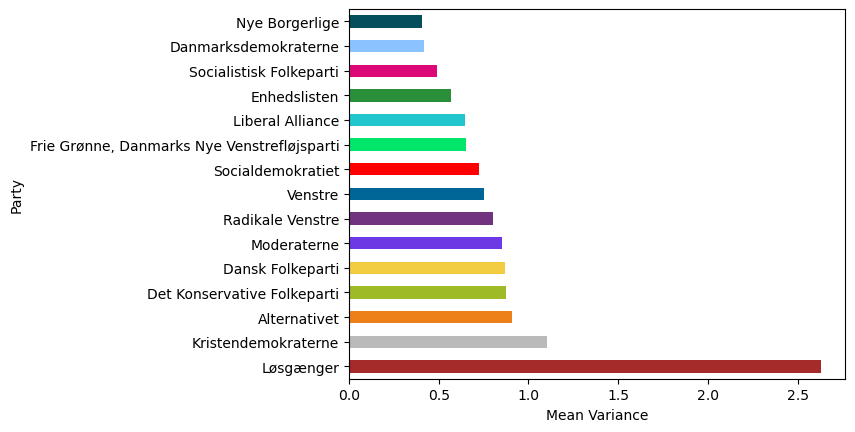

In [27]:
# To get which parties have the biggest internal differences, we can calculate variances of each party's answers

answers_variances = df.drop(['navn', 'alder', 'storkreds'], axis=1).groupby('parti').var()

# To get one number for each party, we can take the mean of these variances to get the average variance of answers in each party
mean_variances = answers_variances.mean(axis=1).sort_values(ascending=False)

# Plot for better visualization
mean_variances.plot(kind='barh', color=[party_colors_palette[party] for party in mean_variances.index])
plt.xlabel('Mean Variance')
plt.ylabel('Party')
plt.show()

# Losgaenger are the party that stands out based on the mean variance. These are the people that are not part of any common party, so it makes sense that their views do not align between each other.


### Inter party differences between candidates

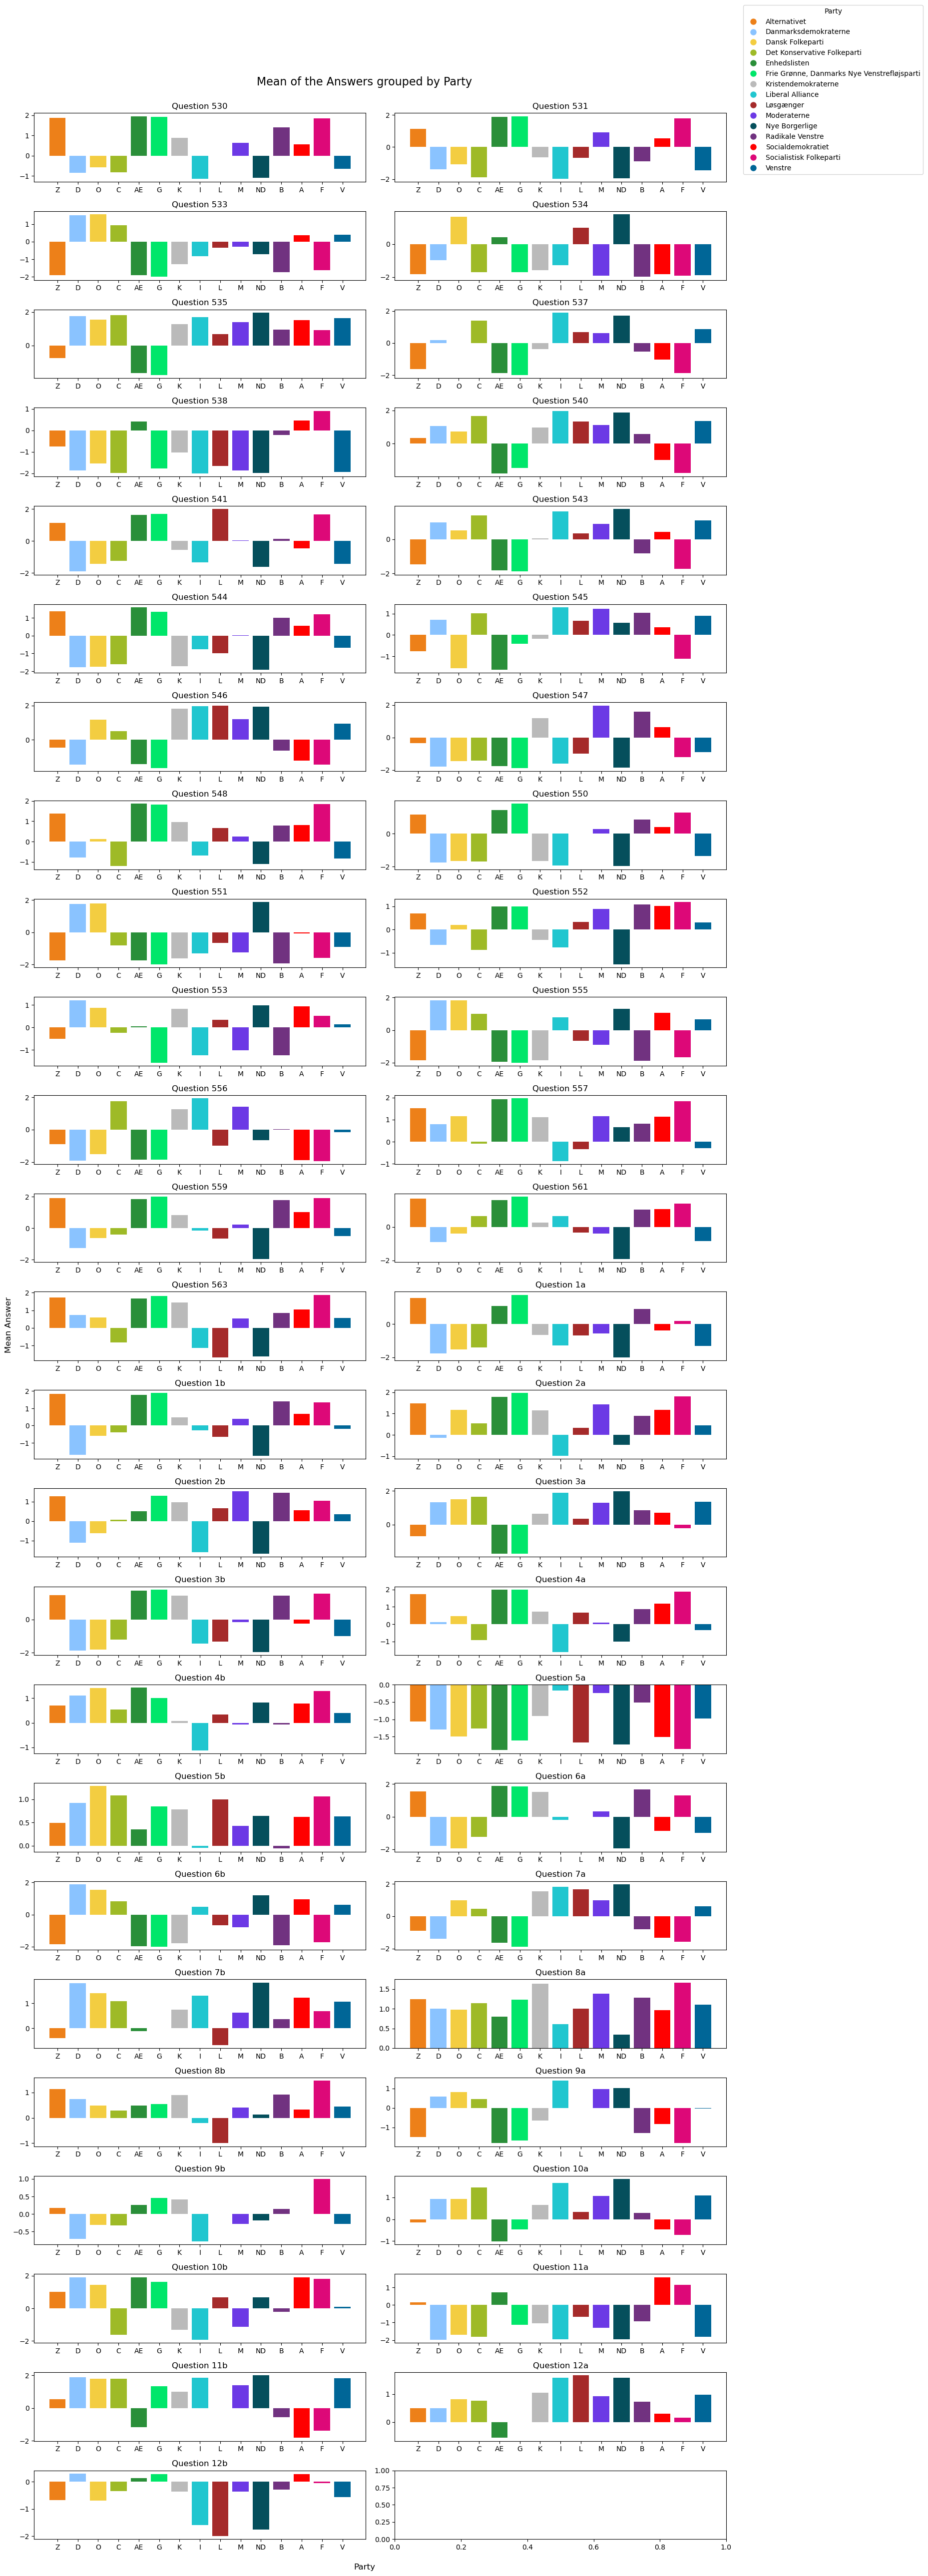

In [105]:
# Retrieve the mean of the answers for all questions per party 
mean_answers = df.drop(['navn', 'alder', 'storkreds'], axis=1).groupby('parti').mean()


# Assign party names to abbreviations
party_abbreviations = {
    "Socialdemokratiet": "A",
    "Radikale Venstre": "B",
    "Det Konservative Folkeparti": "C",
    "Nye Borgerlige": "ND",
    "Socialistisk Folkeparti": "F",
    "Liberal Alliance": "I",
    "Kristendemokraterne": "K",
    "Moderaterne": "M",
    "Dansk Folkeparti": "O",
    "Frie Grønne, Danmarks Nye Venstrefløjsparti": "G",
    "Enhedslisten": "AE",
    "Venstre": "V",
    "Danmarksdemokraterne": "D",
    "Alternativet": "Z",
    "Løsgænger": "L"
}

mapped_index = mean_answers.index.map(party_abbreviations)

fig, axes = plt.subplots(25, 2,figsize=(15,50))

# Loop to create a figure for each question that contains the mean_answers by each party
for i, question in enumerate(mean_answers.columns):
    ax = axes[i // 2, i % 2]
    ax.bar(mapped_index, mean_answers[question], color=[party_colors_palette[party] for party in mean_answers.index])
    ax.set_title(f'Question {question}')


fig.suptitle('Mean of the Answers grouped by Party', fontsize=16, y=1)
fig.supxlabel('Party', y=0.001)
fig.supylabel('Mean Answer')

# Create legend for party colors
legend_content = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=party_colors_palette[party],
            markersize=10, label=party) for party in mean_answers.index]
fig.legend(handles=legend_content, loc='upper right', title='Party', bbox_to_anchor=(1.25, 1.03))

plt.tight_layout()
plt.show()


### Question 4: Predictions of candidates party affiliantions. Investigate if there are any candidates who seem to be in the "wrong" party based on their political landscape positions.

### Decision Tree

In [95]:
#Imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC

In [34]:
#We are preparing a model for the future use
drop_cols = ['storkreds', 'navn', 'alder', 'parti']
questions_df = df.drop(columns=drop_cols)

target = df['parti']
data = questions_df

#defining the function to be reused further to determine which questions hold the highest importance when determening a party
def plot_feature_importances(model):
    n_features = data.shape[1]
    plt.figure(figsize=(20,30))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), data.columns.values, fontsize=8)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

X_rest, X_test, y_rest, y_test = train_test_split(data, target, stratify=target, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_rest, y_rest, stratify=y_rest, random_state=42)


Best validation accuracy: 0.49375
Best validation accuracy: 0.65
Best validation accuracy: 0.65625
Best validation accuracy: 0.675
Best validation accuracy: 0.6875
Best validation accuracy: 0.69375
Best validation accuracy: 0.7125
Best params: {'depth': 7, 'samples_split': 10}
Decision Tree train accuracy: 0.8598326359832636
Decision Tree test accuracy: 0.7183098591549296


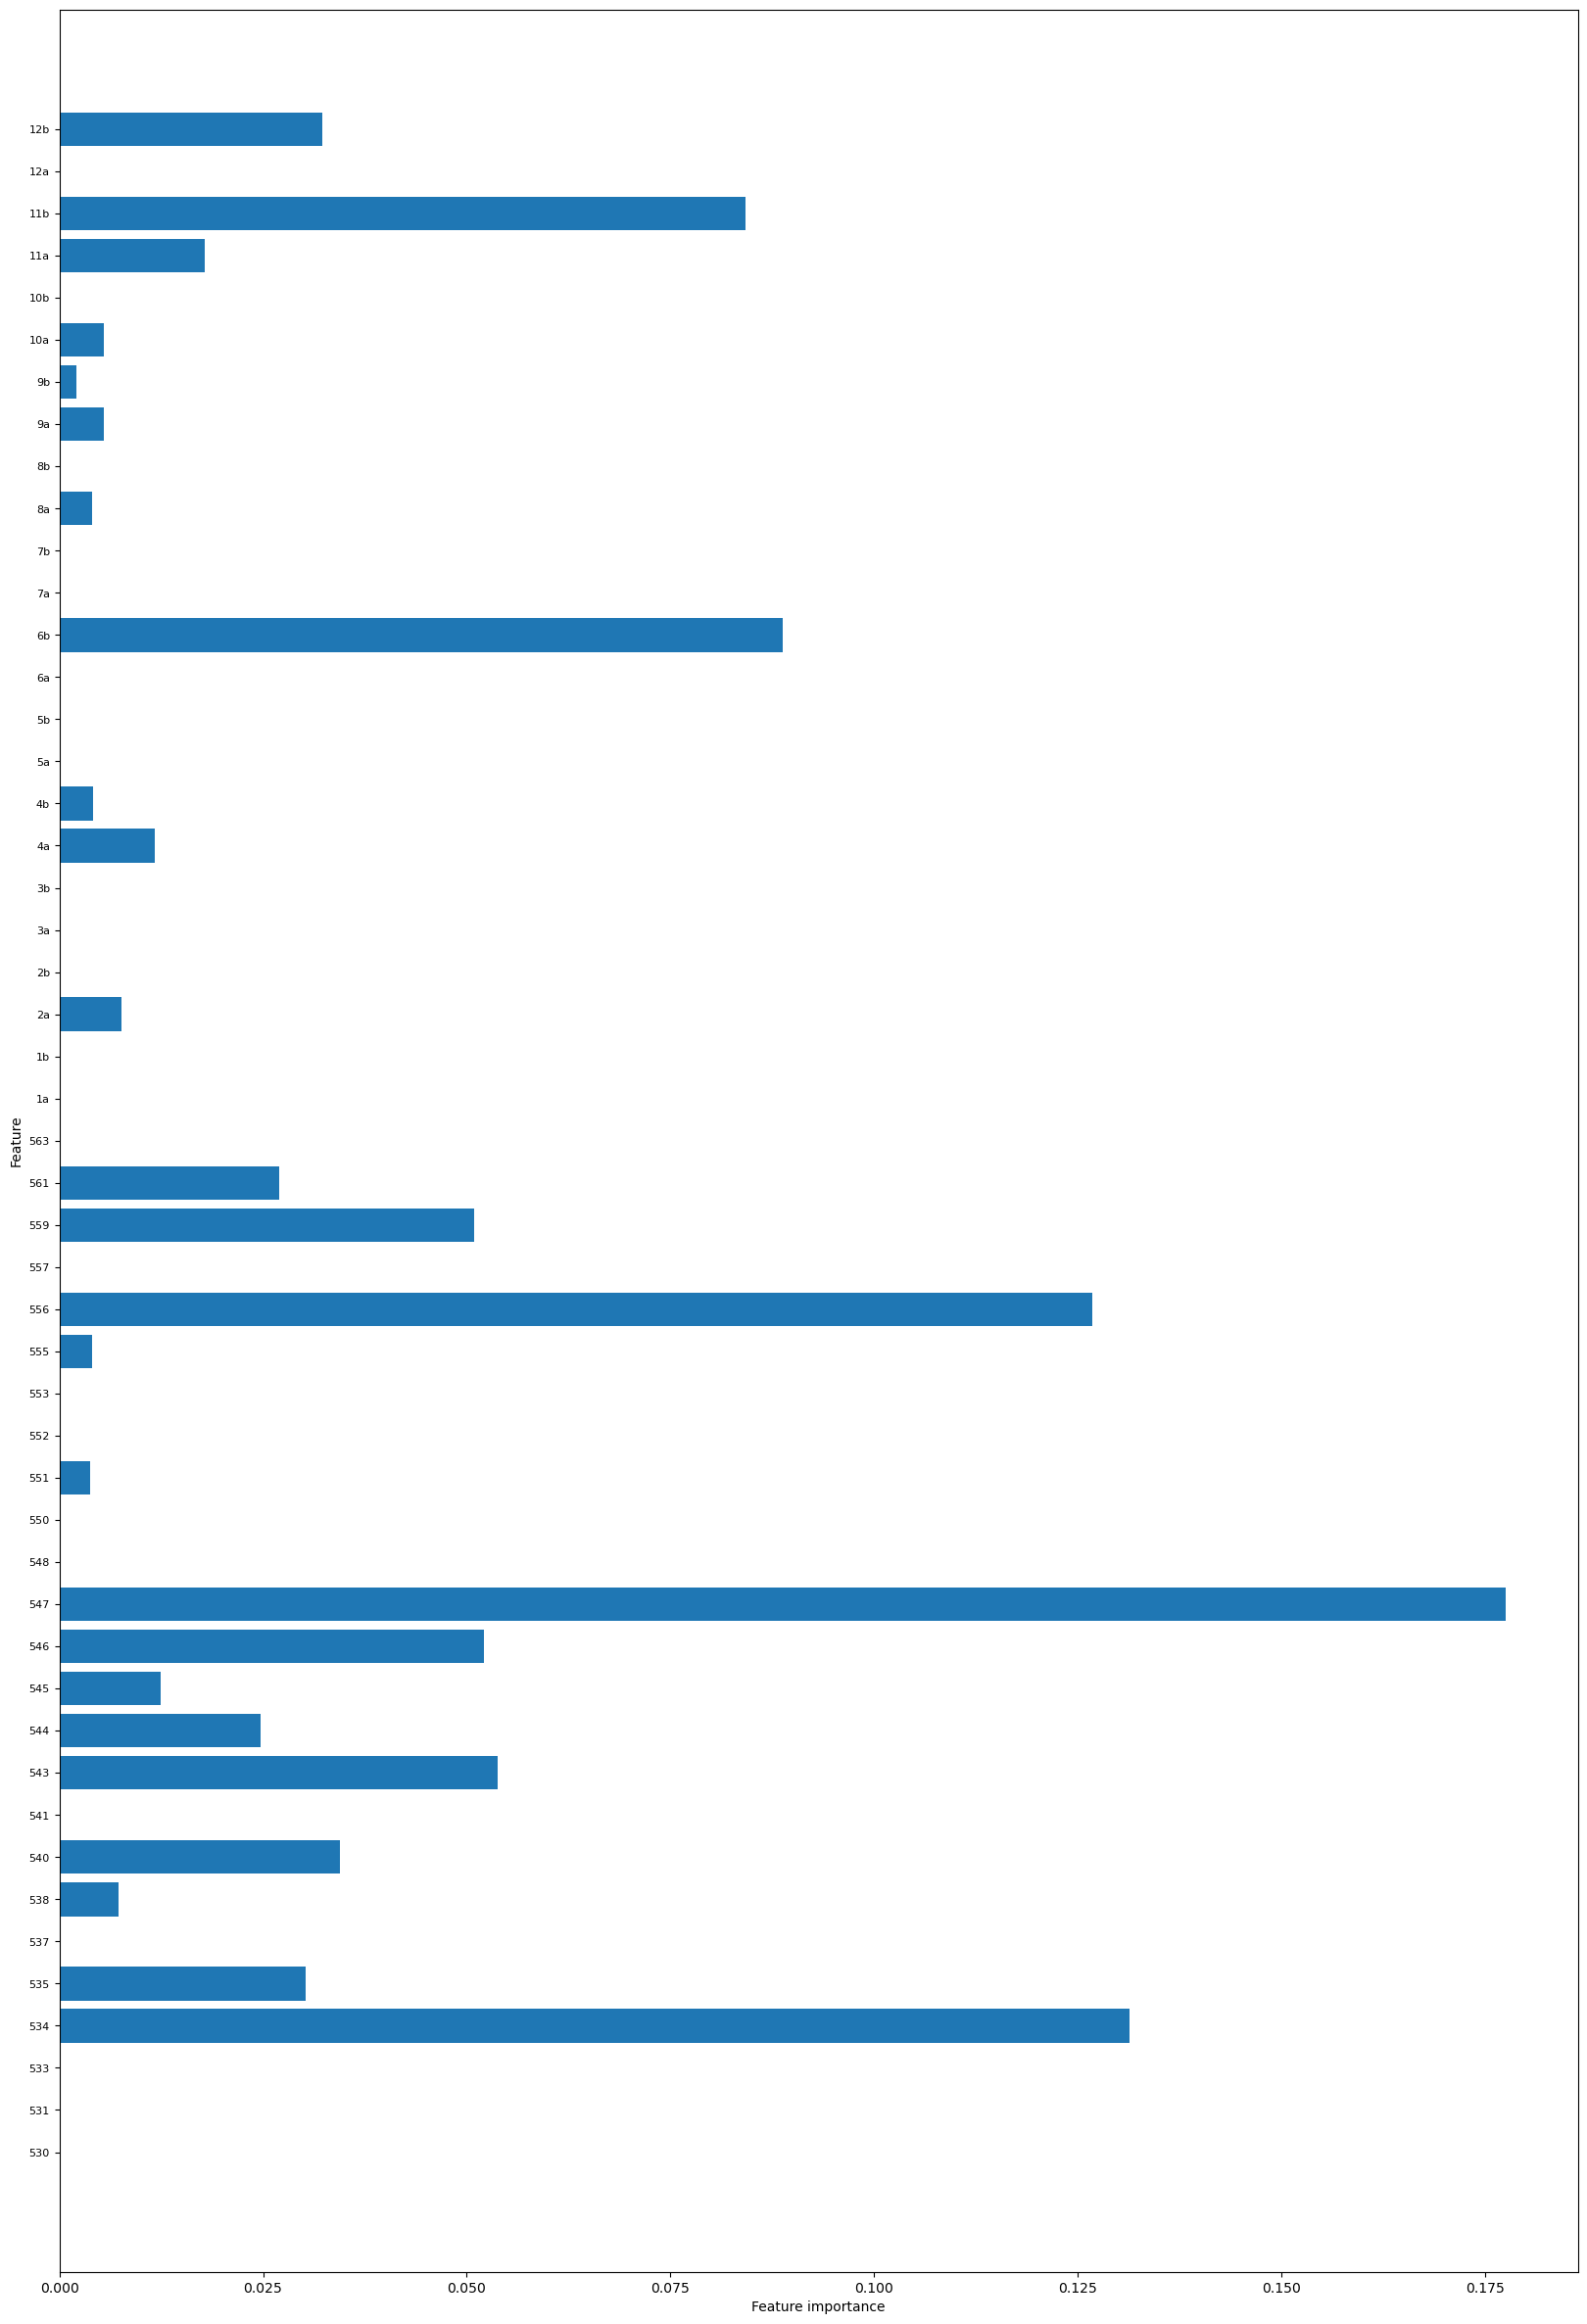

In [55]:

param_grid = {
    'depth': [3, 5, 7, 9],
    'samples_split': [ 3, 5, 10, 13]
}

best_params = {}
best_score = 0

for d in param_grid['depth']:
    for s in param_grid['samples_split']:
        tree = DecisionTreeClassifier(max_depth=d, min_samples_split=s, random_state=42)
        tree.fit(X_train, y_train)

        if tree.score(X_val, y_val) > best_score:
            best_score = tree.score(X_val, y_val)
            print(f'Best validation accuracy: {best_score}')
            best_params = {'depth': d, 'samples_split': s}


print(f'Best params: {best_params}')

tree = DecisionTreeClassifier(max_depth=best_params['depth'], min_samples_split=best_params['samples_split'], random_state=42)
tree.fit(X_rest, y_rest)


print(f"Decision Tree train accuracy: {tree.score(X_train, y_train)}")
print(f"Decision Tree test accuracy: {tree.score(X_test, y_test)}")
plot_feature_importances(tree)


### Random forest

Best validation accuracy: 0.76875
Best validation accuracy: 0.7875
Best validation accuracy: 0.875
Best validation accuracy: 0.88125
Best validation accuracy: 0.8875
Best validation accuracy: 0.89375
{'depth': 6, 'n': 150, 'max_f': 7}
Random forest train accuracy: 0.9707112970711297
Random forest test accuracy: 0.9014084507042254


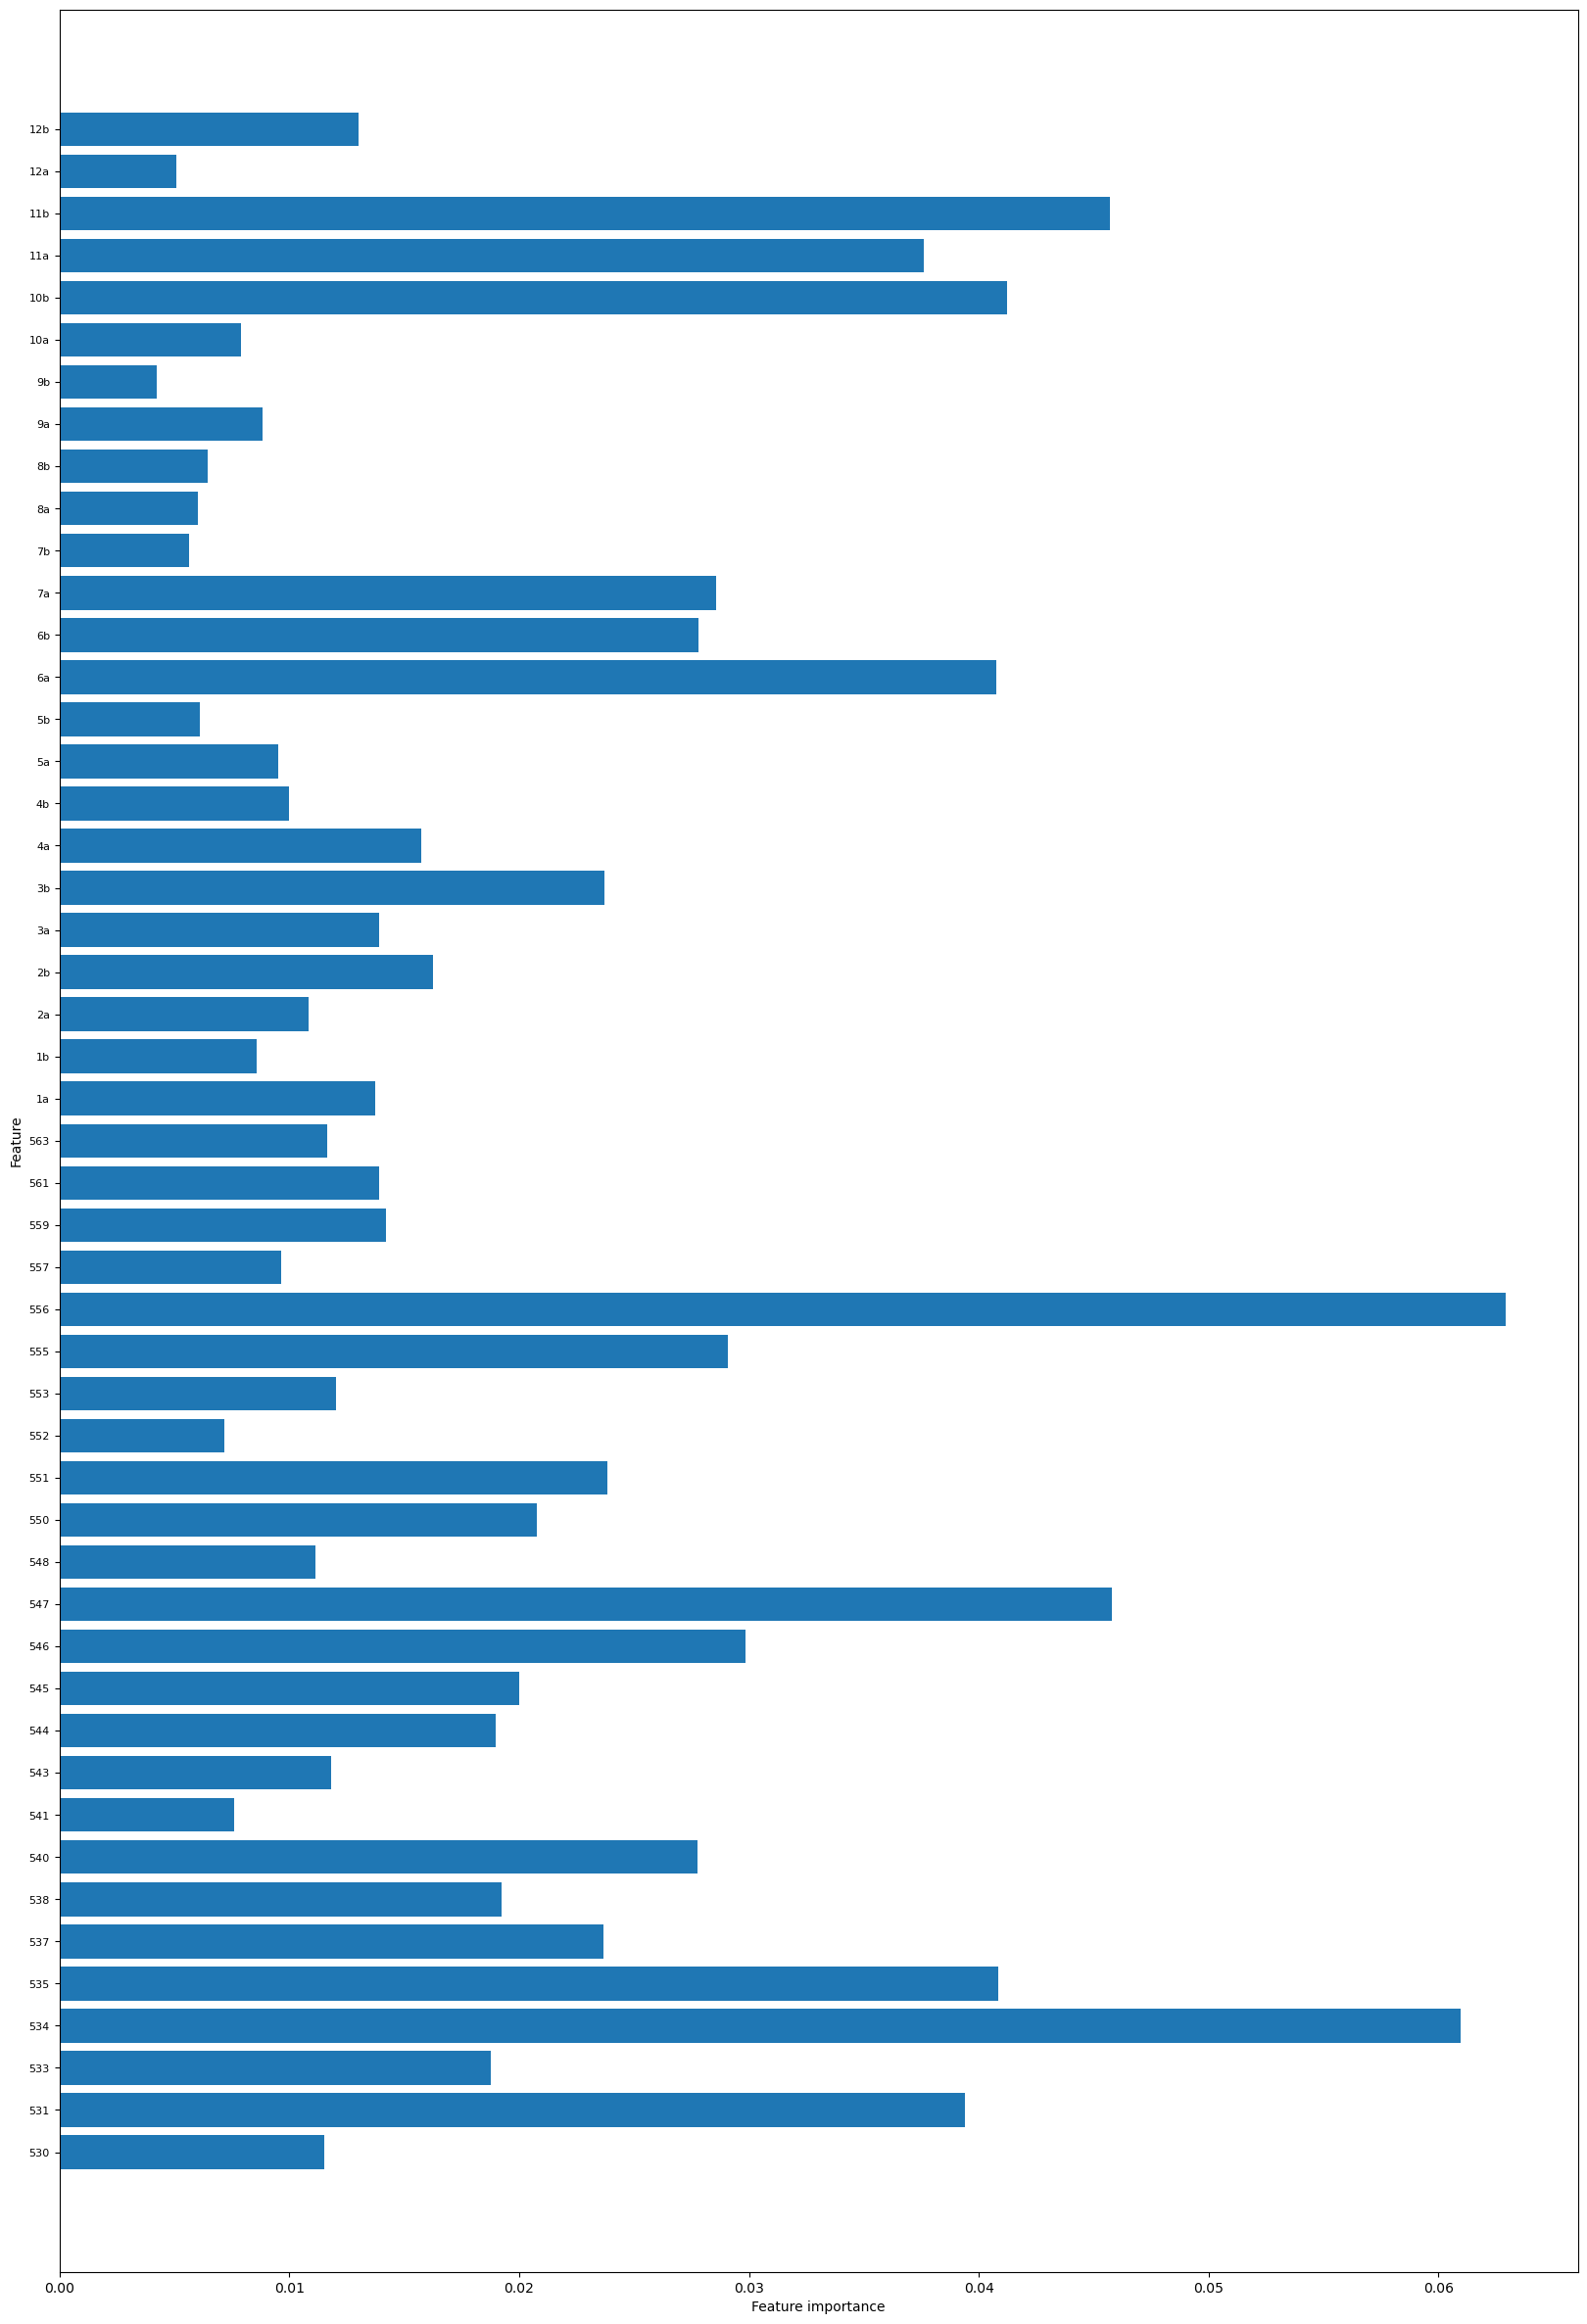

In [72]:
param_grid= {
    'n': [50, 90, 150, 200],
    'depth': [3, 6, 9],
    'max_f': [2, 7]
}

best_params = {}
best_score = 0

for n in param_grid['n']:
    for d in param_grid['depth']:
        for mf in param_grid['max_f']:

            forest = RandomForestClassifier(n_estimators = n, max_depth = d, max_features = mf, random_state = 42)
            forest.fit(X_train, y_train)

            if forest.score(X_val, y_val) > best_score:
                best_score = forest.score(X_val, y_val)
                print(f'Best validation accuracy: {best_score}')
                best_params = {'depth': d, 'n': n, 'max_f': mf}

print(best_params)

forest = RandomForestClassifier(n_estimators = best_params['n'], max_depth  = best_params['depth'], max_features  = best_params['max_f'], random_state = 42)
forest.fit(X_rest, y_rest)

print(f"Random forest train accuracy: {forest.score(X_train, y_train)}")
print(f"Random forest test accuracy: {forest.score(X_test, y_test)}")
plot_feature_importances(forest)

#Random forest discovered that more questions are important when determining a party

### Gradient Boosted Tree

Best validation: 0.7
Best validation: 0.73125
Best validation: 0.80625
Best validation: 0.8375
Best validation: 0.8625
Best validation accuracy is 0.8625 for params: {'n': 90, 'max_depth': 2, 'rate': 0.5}
Gradient Boosted tree train accuracy: 0.2719665271966527
Gradient Boosted tree test accuracy: 0.2300469483568075


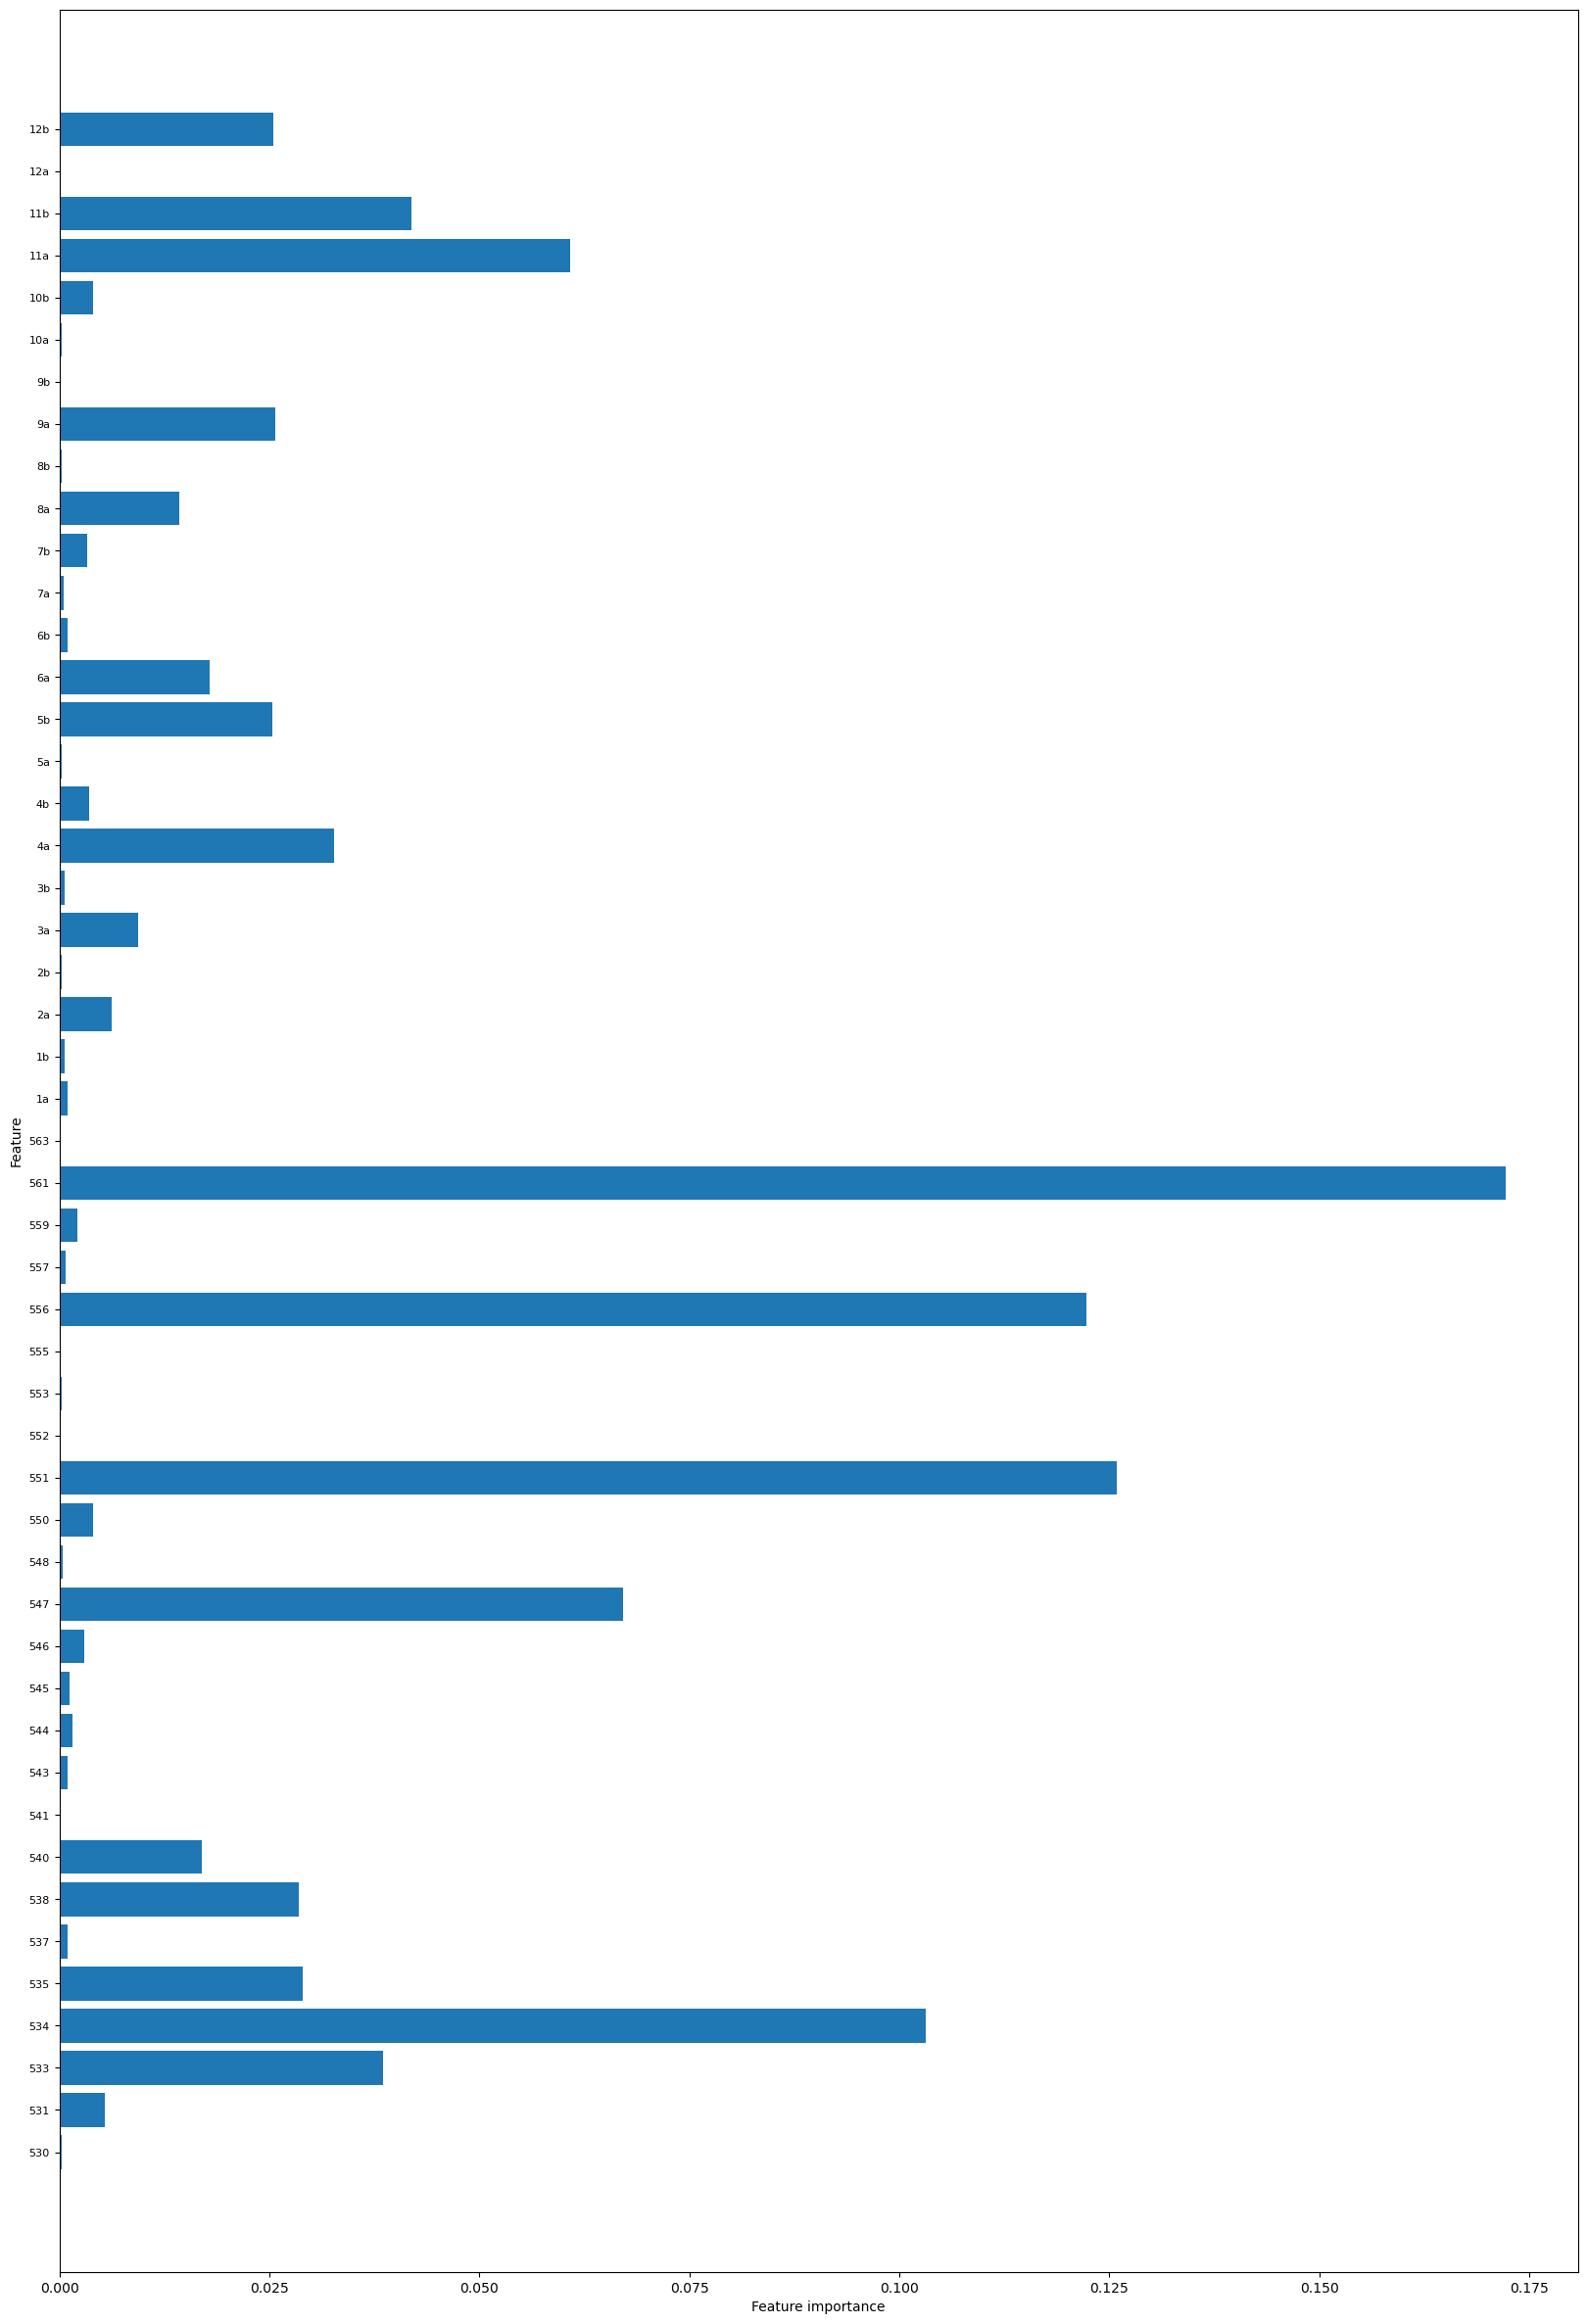

In [80]:
param_grid = {
    'n': [21, 50, 90, 140, 230],
    'max_depth': [2, 6, 10],
    'rate': [0.01, 0.02, 0.5, 1]
}

best_acc = 0
best_params = {}

for n in param_grid['n']:
    for d in param_grid['max_depth']:
        for r in param_grid['rate']:

            boosted = GradientBoostingClassifier(random_state = 42, n_estimators = n, max_depth = d, learning_rate = r)
            boosted.fit(X_train, y_train)

            acc = boosted.score(X_val, y_val)

            if acc > best_acc:
                print(f'Best validation: {acc}')
                best_acc = acc
                best_params = {'n': n, 'max_depth': d, 'rate': r}


print(f'Best validation accuracy is {best_acc} for params: {best_params}')

boosted = GradientBoostingClassifier(random_state=42, n_estimators = best_params['n'], max_depth = best_params['max_depth'], learning_rate = best_params['rate'])
boosted.fit(X_rest, y_rest)

print(f"Gradient Boosted tree train accuracy: {boosted.score(X_train, y_train)}")
print(f"Gradient Boosted tree test accuracy: {boosted.score(X_test, y_test)}")
plot_feature_importances(boosted)


### KNN Classifier

In [87]:
param_grid ={
    'n': [3, 5, 7, 10, 13, 17, 21, 24, 30],
    'metric': ['euclidean', 'manhattan', "minkowski", "chebyshev"]
}

best_acc = 0
best_params = {}

for n in param_grid['n']:
    for m in param_grid['metric']:
        knn = KNeighborsClassifier(n_neighbors=n, metric=m)
        knn.fit(X_train, y_train)

        acc = knn.score(X_val, y_val)

        if acc > best_acc:
            print(f'Best validation: {acc}')
            best_acc = acc
            best_params = {'n': n, 'metric': m}

print(f'Best validation accuracy is {best_acc} for params: {best_params}')

knn = KNeighborsClassifier(n_neighbors=best_params['n'], metric=best_params['metric'])
knn.fit(X_rest, y_rest)

print(f"KNN train accuracy: {knn.score(X_train, y_train)}")
print(f"KNN test accuracy: {knn.score(X_test, y_test)}")


Best validation: 0.8625
Best validation: 0.89375
Best validation accuracy is 0.89375 for params: {'n': 3, 'metric': 'manhattan'}
KNN train accuracy: 0.9309623430962343
KNN test accuracy: 0.8403755868544601


### Support Vector Classifier

In [104]:
param_grid = {
    'C': [0.1, 1, 3, 7, 10, 55, 100, 150],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
}

best_score = 0
best_params = {}

for C in param_grid['C']:
    for kernel in param_grid['kernel']:
        svc = SVC(C=C, kernel=kernel, random_state=42)
        svc.fit(X_train, y_train)
        
        acc = svc.score(X_val, y_val)
    
        if acc > best_score:
            print(f'Best validation: {acc}')
            best_score = acc
            best_params = {'C': C, 'kernel': kernel}
       
print(f'Best validation accuracy is {best_score} for params: {best_params}')

svc = SVC(C=best_params['C'], kernel=best_params['kernel'], random_state=42)
svc.fit(X_train, y_train)

print(f"SVC train accuracy: {svc.score(X_train, y_train)}")
print(f"SVC test accuracy: {svc.score(X_test, y_test)}")

Best validation: 0.875
Best validation: 0.88125
Best validation accuracy is 0.88125 for params: {'C': 1, 'kernel': 'rbf'}
SVC train accuracy: 0.9811715481171548
SVC test accuracy: 0.9154929577464789


Summary of accuracies

- Decision tree:
    Validation accuracy: 0.71
    Train accuracy: 0.85
    Test accuracy: 0.71

- Random forest:
    Validation accuracy: 0.89
    Train accuracy: 0.97
    Test accuracy: 0.90

- Gradient Boosted trees:
    Validation accuracy: 0.86
    Train accuracy: 0.27
    Test accuracy: 0.23

- KNN: 
    Validation accuracy: 0.89
    Train accuracy: 0.93
    Test accuracy: 0.84  

- SVC:
    Validation accuracy: 0.88
    Train accuracy: 0.98
    Test accuracy: 0.91

---

Random forest and SVC performed the best